ibmq_qasm_simulator has 2 qued and simulated qubits
ibmqx2 has 3 qued and 5 qubits
ibmq_16_melbourne has 16 qued and 15 qubits
ibmq_vigo has 4 qued and 5 qubits
ibmq_ourense has 6 qued and 5 qubits
ibmq_london has 0 qued and 5 qubits
ibmq_burlington has 3 qued and 5 qubits
ibmq_essex has 5 qued and 5 qubits
ibmq_armonk has 2 qued and 1 qubits


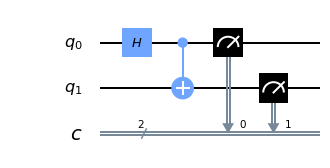

In [1]:
import qiskit as q
from qiskit import IBMQ

%matplotlib inline
provider = IBMQ.load_account()

circuit = q.QuantumCircuit(2,2) # 2 qubits 2 clasical bits
# currently: 0,0
circuit.h(0)
# 1,0
circuit.cx(0, 1) # cnot flips 2nd qubit value IF first qubit is 1
circuit.measure([0,1], [0,1])

provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(backend.name(), "has", backend.status().pending_jobs, "qued and", qubit_count, "qubits")
circuit.draw()

Job Status: job has successfully run


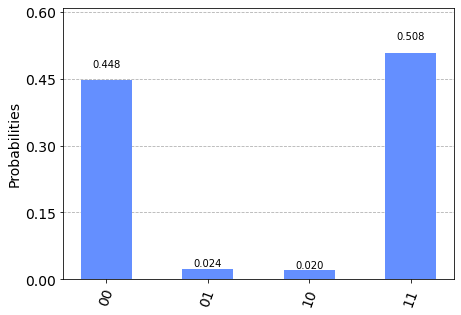

In [23]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmqx2")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])